In [2]:
# pytorch provides torch.utils.data.Dataloader and torch.utils.data.Dataset to pro-loaded datasets

# pytorch also provide some datasets

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor # 把图像从PIL/Numpy转换到Tensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(#定义一个dataset对象
    root="data",#root是数据存放数据
    train=True,#分辨是训练集而不是数据集
    download=True,#从网上下载
    transform=ToTensor()#转化成tensor形状
)
#这里转化为tensor会把图像转成tensor格式，然后像素值从0-255归一到0.0-1.0，输出形状是【1,28,28】，1表示channel数（灰度图）

test_data = datasets.FashionMNIST(
    root="data",
    train=False,#测试集
    download=True,
    transform=ToTensor()
)
#注意这两个对象的定义实际上还没开始取数据，而是定义了如何取第一个数据的规则，之后用了才会开始取

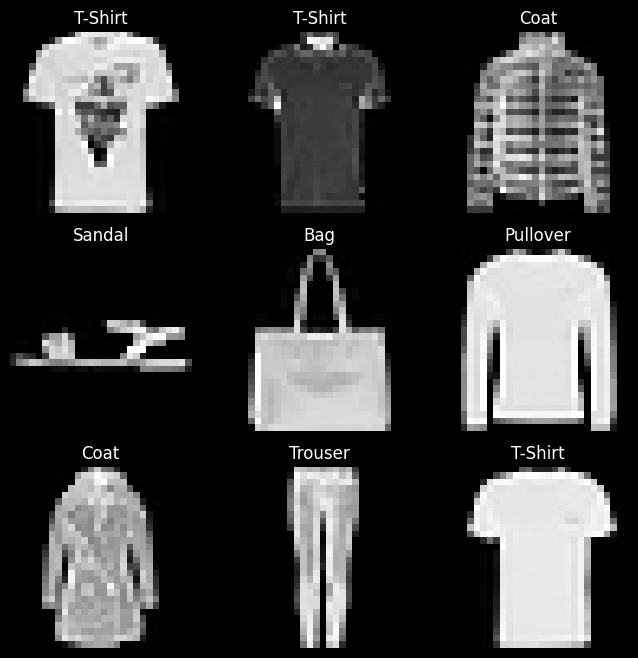

In [3]:
labels_map = { #训练的label是整数，这里是方便理解
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
#创建matplotlib画布
figure = plt.figure(figsize=(8, 8)) #英寸，不是像素
cols, rows = 3, 3 #准备画九张图
for i in range(1, cols * rows + 1): #循环次数
    sample_idx = torch.randint(len(training_data), size=(1,)).item() #随机抽一个样本下标
    img, label = training_data[sample_idx] #随机下标对应的数据取出来
    figure.add_subplot(rows, cols, i) #选中格子，i是格子位置
    plt.title(labels_map[label]) #给图添加标题
    plt.axis("off") #关掉坐标轴、刻度、边框数字
    plt.imshow(img.squeeze(), cmap="gray") #把tensor完整画出来
plt.show() #现实出来

In [4]:
import os
import pandas as pd
from torchvision.io import decode_image

class CustomImageDataset(Dataset): #仿造一个新的Dataset，行为和FashionMNIST一模一样，定义如何取数据的规则
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None): #init只读索引，登记“我有哪些资源”
        #只在dataset = CustomImageDataset(csv, img_dir, transform=...)时运行一次，初始化目录结构、索引表、处理规则
        self.img_labels = pd.read_csv(annotations_file) #一个CSV文件，存label，其实就是一个索引表
        self.img_dir = img_dir #存图片的文件夹路径，但此时一张图片都没开始读
        self.transform = transform
        self.target_transform = target_transform#这两个类似指针

    def __len__(self): #dataset的边界定义
        return len(self.img_labels) #len(dataset)时候被调用，返回样本数

    def __getitem__(self, idx): #取数据的地方
        # dataset[idx]时调用，由编号idx，返回第idx个样本
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0]) #用idx查CSV
        image = decode_image(img_path)#真正读了磁盘
        label = self.img_labels.iloc[idx, 1] #从CSV取label
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [5]:
from torch.utils.data import DataLoader #官方提供的数据管理工具

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True) #每次迭代返回64个x, y，shuffle true意味着每个epoch开始时把整个数据集的样本顺序随机打乱
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [6]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
#从dataloader中取出一个batch，iter把train_dataloader变成一个迭代器，从头开始发batch，next从这个迭代器拿出下一个batch
print(f"Feature batch shape: {train_features.size()}") #打印batch的形状
print(f"Labels batch shape: {train_labels.size()}") #打印label batch的形状
img = train_features[0].squeeze() #取出batch的第一张图，挤掉多余维度
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

Label: 9
